In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import graphviz
import pydotplus
from PIL import Image
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [35]:
Medi = pd.read_csv('drugs.csv')
Medi

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [36]:
feature_cols = ['Age','Sex','BP','Cholesterol','Na_to_K']
X = Medi[feature_cols].values
y = Medi['Drug']

In [37]:
y.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [38]:
# Preprocesando los datos

Pre_sex = preprocessing.LabelEncoder()
Pre_sex.fit(['F','M'])
X[:,1] = Pre_sex.transform(X[:,1])

Pre_BP = preprocessing.LabelEncoder()
Pre_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = Pre_BP.transform(X[:,2])

Pre_Chol = preprocessing.LabelEncoder()
Pre_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = Pre_Chol.transform(X[:,3])

In [39]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [41]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [42]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 0,  0,  0,  0, 33]])

Text(33.22222222222222, 0.5, 'Y Real')

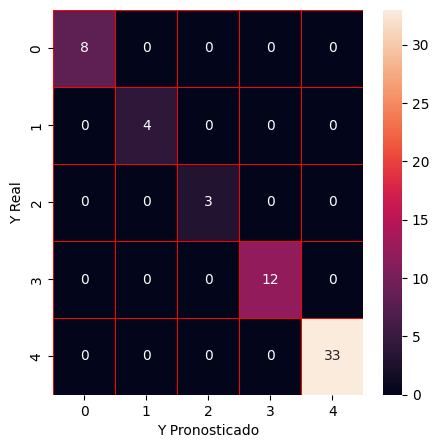

In [43]:
f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('Y Pronosticado')
plt.ylabel('Y Real')

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        33

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [45]:
# creación de informacion del árbol

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols, class_names=['drugA','drugB','drugC','drugX','drugY'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [46]:
graph.write_png('drugtree1.png')
graph.write_pdf('drugtree1.pdf')

img = Image.open('drugtree1.png')
img.show()

## Árbol de decisión por metodo Gini

In [47]:
clf = DecisionTreeClassifier(criterion="gini", max_depth = 4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [48]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 0,  0,  0,  0, 33]])

Text(33.22222222222222, 0.5, 'Y Real')

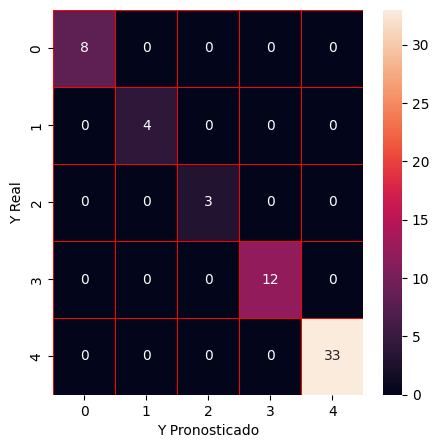

In [49]:
f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('Y Pronosticado')
plt.ylabel('Y Real')

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        33

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [51]:
# creación de informacion del árbol

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols, class_names=['drugA','drugB','drugC','drugX','drugY'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [52]:
graph.write_png('drugtree2.png')
graph.write_pdf('drugtree2.pdf')

img = Image.open('drugtree2.png')
img.show()

In [53]:
# Prueba con sujeto 1

df_prueba = pd.read_csv('sujeto_medi.csv')

prueba_cols = ['Age','Sex','BP','Cholesterol','Na_to_K']
X_prueba = df_prueba[feature_cols].values

In [54]:
df_prueba

,Age,Sex,BP,Cholesterol,Na_to_K
0,50,F,HIGH,NORMAL,15.302


In [55]:
Pre_sex = preprocessing.LabelEncoder()
Pre_sex.fit(['F','M'])
X_prueba[:,1] = Pre_sex.transform(X_prueba[:,1])

Pre_BP = preprocessing.LabelEncoder()
Pre_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X_prueba[:,2] = Pre_BP.transform(X_prueba[:,2])

Pre_Chol = preprocessing.LabelEncoder()
Pre_Chol.fit([ 'NORMAL', 'HIGH'])
X_prueba[:,3] = Pre_Chol.transform(X_prueba[:,3])

X_prueba[0:5]

array([[50, 0, 0, 1, 15.302]], dtype=object)

In [56]:
# realizar prueba de predicción de X_prueba con el modelo entrenado

y_prueba = clf.predict(X_prueba)
y_prueba

array(['drugY'], dtype=object)